In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

path = "c:\Windows/Fonts/NanumGothic.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False


## 데이터 불러오기

In [20]:
subway2019 = pd.read_excel('./2019_1_to_8.xlsx', header = 1)
subway2020 = pd.read_csv('./2020_1_to_8.csv', encoding='cp949')
subway2021 = pd.read_csv('./subway.csv', encoding='cp949')

## 데이터 전처리

In [21]:
# 2019 데이터 전처리
# 승차+하차 계산
subway2019.rename(columns = {"합 계": "합계"}, inplace = True) # 합 계 -> 합계로 컬럼명 변경
pre2019 = subway2019.iloc[:, [0, 1, 2, 3, 4, -1]].copy()
pre2019['날짜'] = pre2019['날짜'].apply(lambda x : pd.to_datetime(str(x), format="%Y-%m-%d")) # datetime object로 바꾸기
pre2019 = pre2019.groupby(['날짜', '호선', '역번호', '역명'], as_index=False).sum()
pre2019

,날짜,호선,역번호,역명,합계
0,2019-01-01,1호선,150,서울역,70838
1,2019-01-01,1호선,151,시청,22195
2,2019-01-01,1호선,152,종각,37792
3,2019-01-01,1호선,153,종로3가,33882
4,2019-01-01,1호선,154,종로5가,26993
...,...,...,...,...,...
100397,2019-12-31,8호선,2823,남한산성입구(성남법원.검찰청),27112
100398,2019-12-31,8호선,2824,단대오거리,22355
100399,2019-12-31,8호선,2825,신흥,11225
100400,2019-12-31,8호선,2826,수진,12224


In [22]:
# 2020 데이터 전처리
# 합계가 없어서 합계 column 추가
subway2020['합계'] = subway2020.iloc[:, 5:].sum(axis=1)
subway2020.head(5)

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,합계
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,3194,3342,3002,2857,2311,2523,1830,987,25,36641
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2354,2261,1922,1696,1620,1181,768,426,77,30085
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,1019,1234,1383,1271,1061,991,572,217,2,12212
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,783,849,602,435,293,273,174,149,26,10608
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1748,1890,1879,1827,1955,1800,1259,406,6,20523


In [23]:
# 승차+하차 계산
pre2020 = subway2020.iloc[:, [0, 1, 2, 3, 4, -1]].copy()
pre2020['날짜'] = pre2020['날짜'].apply(lambda x : pd.to_datetime(str(x), format="%Y-%m-%d")) # datetime object로 바꾸기
pre2020 = pre2020.groupby(['날짜', '호선', '역번호', '역명'], as_index=False).sum()
pre2020

,날짜,호선,역번호,역명,합계
0,2020-01-01,1호선,150,서울역,66726
1,2020-01-01,1호선,151,시청,22820
2,2020-01-01,1호선,152,종각,36924
3,2020-01-01,1호선,153,종로3가,32652
4,2020-01-01,1호선,154,종로5가,24738
...,...,...,...,...,...
101135,2020-12-31,8호선,2823,남한산성입구(성남법원.검찰청),18805
101136,2020-12-31,8호선,2824,단대오거리,15180
101137,2020-12-31,8호선,2825,신흥,7686
101138,2020-12-31,8호선,2826,수진,7807


In [24]:
# 2021 데이터 전처리
# 합계가 없어서 합계 column 추가
subway2021['합계'] = subway2021.iloc[:, 5:].sum(axis=1)
subway2021.head(5) # 합계 슥 보기만 해도 엄청 인원이 줄었음

,날짜,호선,역번호,역명,구분,6시이전,6시-7시,7시-8시,8시-9시,9시-10시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시이후,합계
0,2021-01-01,1호선,150,서울역,승차,86,111,157,306,333,...,837,796,839,658,579,479,510,445,101,9339
1,2021-01-01,1호선,150,서울역,하차,85,355,438,592,841,...,781,710,626,437,425,354,307,134,77,9951
2,2021-01-01,1호선,151,시청,승차,43,45,75,111,95,...,227,233,347,294,186,216,204,110,29,2947
3,2021-01-01,1호선,151,시청,하차,40,145,176,312,223,...,158,140,152,121,57,54,64,23,17,2700
4,2021-01-01,1호선,152,종각,승차,49,59,89,126,125,...,513,548,504,572,492,593,513,130,31,5686


In [25]:
# 승차+하차 계산
pre2021 = subway2021.iloc[:, [0, 1, 2, 3, 4, -1]].copy()
pre2021['날짜'] = pre2021['날짜'].apply(lambda x : pd.to_datetime(str(x), format="%Y-%m-%d")) # datetime object로 바꾸기
pre2021 = pre2021.groupby(['날짜', '호선', '역번호', '역명'], as_index=False).sum()
pre2021

,날짜,호선,역번호,역명,합계
0,2021-01-01,1호선,150,서울역,19290
1,2021-01-01,1호선,151,시청,5647
2,2021-01-01,1호선,152,종각,10673
3,2021-01-01,1호선,153,종로3가,10725
4,2021-01-01,1호선,154,종로5가,7477
...,...,...,...,...,...
67933,2021-08-31,8호선,2823,남한산성입구(성남법원.검찰청),23003
67934,2021-08-31,8호선,2824,단대오거리,18351
67935,2021-08-31,8호선,2825,신흥,8054
67936,2021-08-31,8호선,2826,수진,9250


## 2019 일별 -> 월별 리스트 생성

In [26]:
day_list_2019 = subway2019.iloc[:, [0, -1]].copy()
day_list_2019 = day_list_2019.groupby('날짜',as_index=False).sum() # 일별 지하철 승하차 합계 계산
day_list_2019.head(5)

,날짜,합계
0,2019-01-01,4312350
1,2019-01-02,10134974
2,2019-01-03,10508422
3,2019-01-04,10981933
4,2019-01-05,7839964


In [27]:
month_list_2019 = day_list_2019.set_index('날짜').resample('M').sum() # 월별 지하철 승하차 합계 계산
month_list_2019

,합계
날짜,
2019-01-31,292689642
2019-02-28,249323330
2019-03-31,304589016
2019-04-30,306816128
2019-05-31,315308633
2019-06-30,287164961
2019-07-31,300020250
2019-08-31,286403367
2019-09-30,276392231


## 2020 일별 -> 월별 리스트 생성

In [28]:
day_list_2020 = subway2020.iloc[:, [0, -1]].copy()
day_list_2020 = day_list_2020.groupby('날짜',as_index=False).sum() # 일별 지하철 승하차 합계 계산
day_list_2020.head(5)

,날짜,합계
0,2020-01-01,4375264
1,2020-01-02,10157852
2,2020-01-03,10846500
3,2020-01-04,7752350
4,2020-01-05,5518080


In [29]:
day_list_2020['날짜'] = day_list_2020['날짜'].apply(lambda x : pd.to_datetime(str(x), format="%Y-%m-%d")) # datetime object로 바꾸기
month_list_2020 = day_list_2020.set_index('날짜').resample('M').sum() # 월별 지하철 승하차 합계 계산
month_list_2020

,합계
날짜,
2020-01-31,271345338
2020-02-29,223792012
2020-03-31,185091447
2020-04-30,195863259
2020-05-31,214825761
2020-06-30,224398553
2020-07-31,239245382
2020-08-31,199987015
2020-09-30,188091713


## 2021 일별 -> 월별 리스트 생성

In [30]:
day_list_2021 = subway2021.iloc[:, [0, -1]].copy()
day_list_2021 = day_list_2021.groupby('날짜',as_index=False).sum() # 일별 지하철 승하차 합계 계산
day_list_2021.head(5)

,날짜,합계
0,2021-01-01,1928570
1,2021-01-02,3069161
2,2021-01-03,2341590
3,2021-01-04,6906853
4,2021-01-05,6920884


In [31]:
day_list_2021['날짜'] = day_list_2021['날짜'].apply(lambda x : pd.to_datetime(str(x), format="%Y-%m-%d")) # datetime object로 바꾸기
month_list_2021 = day_list_2021.set_index('날짜').resample('M').sum() # 월별 지하철 승하차 합계 계산
month_list_2021

,합계
날짜,
2021-01-31,185524250
2021-02-28,185867196
2021-03-31,231877389
2021-04-30,229293095
2021-05-31,224010342
2021-06-30,231141249
2021-07-31,206348280
2021-08-31,197316746


## 2019, 2020, 2021 그래프 합산 결과

In [32]:
result_graph = pd.concat([month_list_2019, month_list_2020, month_list_2021]) # 데이터 합치기
result_graph

,합계
날짜,
2019-01-31,292689642
2019-02-28,249323330
2019-03-31,304589016
2019-04-30,306816128
2019-05-31,315308633
2019-06-30,287164961
2019-07-31,300020250
2019-08-31,286403367
2019-09-30,276392231


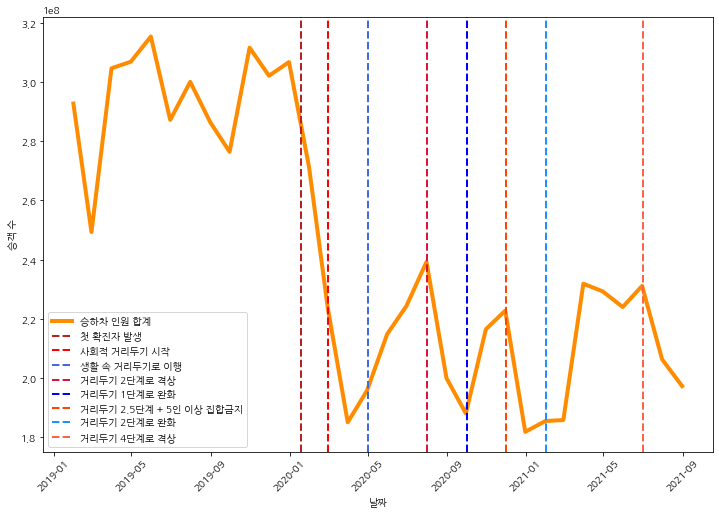

In [55]:
from datetime import datetime
import seaborn as sns
# sns.set(font="AppleGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')
plt.plot(result_graph, linewidth=4, color='darkorange', label='승하차 인원 합계')
plt.rcParams['figure.figsize'] = [12, 8]
# plt.title("2019~2021년 8월까지의 지하철 승객 수 변화")
plt.ylabel("승객 수")
plt.xlabel("날짜")
plt.xticks(rotation=45)
plt.axvline(x=datetime(2020, 1, 18), color='firebrick', linestyle='--', linewidth=2, label='첫 확진자 발생') # 첫 확진자 발생
plt.axvline(x=datetime(2020, 3, 1), color='red', linestyle='--', linewidth=2, label='사회적 거리두기 시작') # 신천지발 확진자 급증으로 강도 높은 사회적 거리두기 시작
plt.axvline(x=datetime(2020, 5, 1), color='royalblue', linestyle='--', linewidth=2, label='생활 속 거리두기로 이행') # ??
plt.axvline(x=datetime(2020, 8, 1), color='crimson', linestyle='--', linewidth=2, label='거리두기 2단계로 격상') # 사회적 거리두기 2단계 격상, 사랑제일교회 확진자 급증
# plt.axvline(x=datetime(2020, 9, 1), color='green', linestyle='--', linewidth=2) # 사회적 거리두기 2.5단계 격상, 2주 후 2단계로 조정
plt.axvline(x=datetime(2020, 10, 1), color='blue', linestyle='--', linewidth=2, label='거리두기 1단계로 완화') # 사회적 거리두기 1단계로 완화
plt.axvline(x=datetime(2020, 12, 1), color='orangered', linestyle='--', linewidth=2, label='거리두기 2.5단계 + 5인 이상 집합금지') # 2.5단계 + 특별방역대책, 5인이상 집합금지 시행
plt.axvline(x=datetime(2021, 2, 1), color='dodgerblue', linestyle='--', linewidth=2, label='거리두기 2단계로 완화') # 2단계 하향
plt.axvline(x=datetime(2021, 7, 1), color='tomato', linestyle='--', linewidth=2, label='거리두기 4단계로 격상') # 4단계 격상
plt.legend()
plt.show()

In [34]:
# 2020년
# 1월 - 국내 첫 확진자 발생
# 2월 - 신천지 관련 확진자 발생 및 급증
# 3월~4월 - 강도 높은 사회적 거리두기
# 8월 - 사회적거리두기 2단계 격상, 사랑제일교회 관련 확진자 발생 및 급증
# 9월 - 수도권 2.5단계로 격상 (8월30일부터), 9월13일부터 수도권 2주간 2단계로 조정
# 10월 - 사회적거리두기 1단계로 완화
# 11월 - 1.5단계~2단계
# 12월 - 2.5단계 + 특별방역대책, 5인이상 집합금지 시행
# 2021년
# 2월 - 2단계
# 7월 - 4단계 격상